In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [2]:
df = pd.read_csv('cryogenic_chamber_data.csv', parse_dates=['timestamp'])
df.sort_values('timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,timestamp,chamber_temp_K,chamber_pressure_bar,external_temp_K,power_input
0,2025-01-01 00:00:00,10.248357,0.000007,299.740952,77.718373
1,2025-01-01 00:15:00,10.325287,0.000009,300.056077,87.381383
2,2025-01-01 00:30:00,11.111001,0.000007,300.136211,81.158796
3,2025-01-01 00:45:00,11.938057,0.000009,300.337823,89.040084
4,2025-01-01 01:00:00,11.443838,0.000004,299.850995,95.716994


### Exploratory Data Analysis

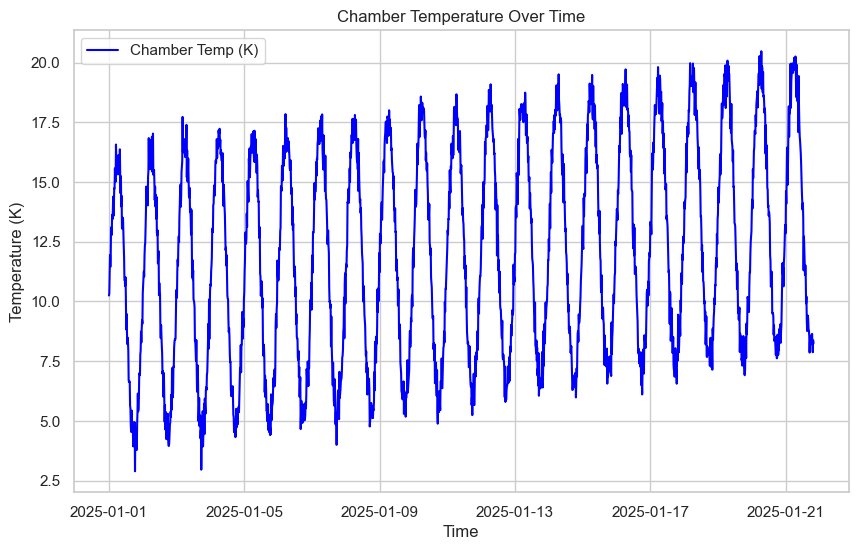

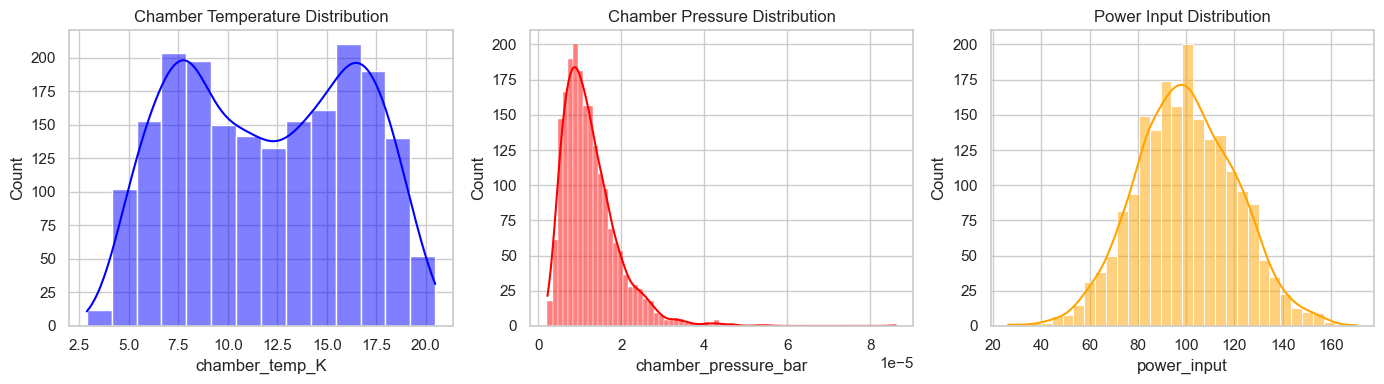

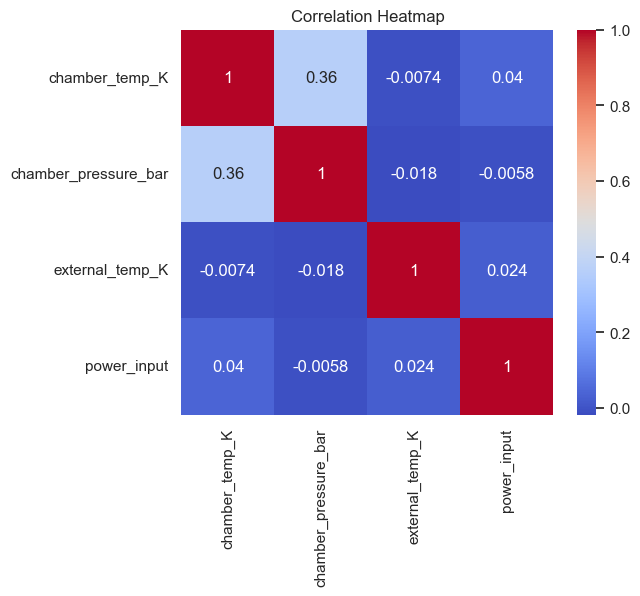

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['chamber_temp_K'], label='Chamber Temp (K)', color='blue')
plt.title("Chamber Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()

# Distribution plots
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['chamber_temp_K'], kde=True, color='blue')
plt.title("Chamber Temperature Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df['chamber_pressure_bar'], kde=True, color='red')
plt.title("Chamber Pressure Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['power_input'], kde=True, color='orange')
plt.title("Power Input Distribution")

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 5))
corr = df[['chamber_temp_K', 'chamber_pressure_bar','external_temp_K','power_input']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Data Preprocessing

#### Seaborn to quickly visualise distributions, relationships, or correlations, and matplotlib for finetuning (arranging subplots, control plot dimensions, or add custom annotations

In [5]:
feature_cols = ['chamber_temp_K', 'chamber_pressure_bar', 'external_temp_K', 'power_input']
df_features = df[feature_cols].copy()

scaler = MinMaxScaler() # transforms each feature to a 0-1 range
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled, columns=feature_cols)
df_scaled['timestamp'] = df['timestamp']

print("\nData after MinMax scaling (first 5 rows):")
print(df_scaled.head())

df_scaled.to_csv('cryogenic_chamber_data_scaled.csv', index=False)
print("Preprocessed data saved to 'cryogenic_chamber_data_scaled.csv'.")


Data after MinMax scaling (first 5 rows):
   chamber_temp_K  chamber_pressure_bar  external_temp_K  power_input  \
0        0.418478              0.062093         0.462116     0.356676   
1        0.422853              0.086940         0.516752     0.423619   
2        0.467534              0.060842         0.530646     0.380511   
3        0.514566              0.086827         0.565601     0.435110   
4        0.486461              0.027022         0.481195     0.481365   

            timestamp  
0 2025-01-01 00:00:00  
1 2025-01-01 00:15:00  
2 2025-01-01 00:30:00  
3 2025-01-01 00:45:00  
4 2025-01-01 01:00:00  
Preprocessed data saved to 'cryogenic_chamber_data_scaled.csv'.


In [6]:
df_scaled.head()

,chamber_temp_K,chamber_pressure_bar,external_temp_K,power_input,timestamp
0,0.418478,0.062093,0.462116,0.356676,2025-01-01 00:00:00
1,0.422853,0.086940,0.516752,0.423619,2025-01-01 00:15:00
2,0.467534,0.060842,0.530646,0.380511,2025-01-01 00:30:00
3,0.514566,0.086827,0.565601,0.435110,2025-01-01 00:45:00
4,0.486461,0.027022,0.481195,0.481365,2025-01-01 01:00:00
